## Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import optuna
from imblearn.over_sampling import SMOTE

In [6]:
np.random.seed(42)
tf.random.set_seed(42)

In [7]:
sns.set_style('whitegrid')

In [8]:
df = pd.read_csv('./data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Data pre-processing

### Duplicate values 

In [10]:
df.duplicated().sum()

np.int64(1081)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [13]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


All the features are normally distributed with a mean around 0 and std around 1 except the `Amount` column

In [14]:
X = df.iloc[:, 1:-1] # Not considering the Time feature
y = df['Class'].to_numpy()

### Outliers

In [15]:
normal = X[y == 0]
fraud = X[y == 1]
normal.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)
normal.shape, fraud.shape

((283253, 29), (473, 29))

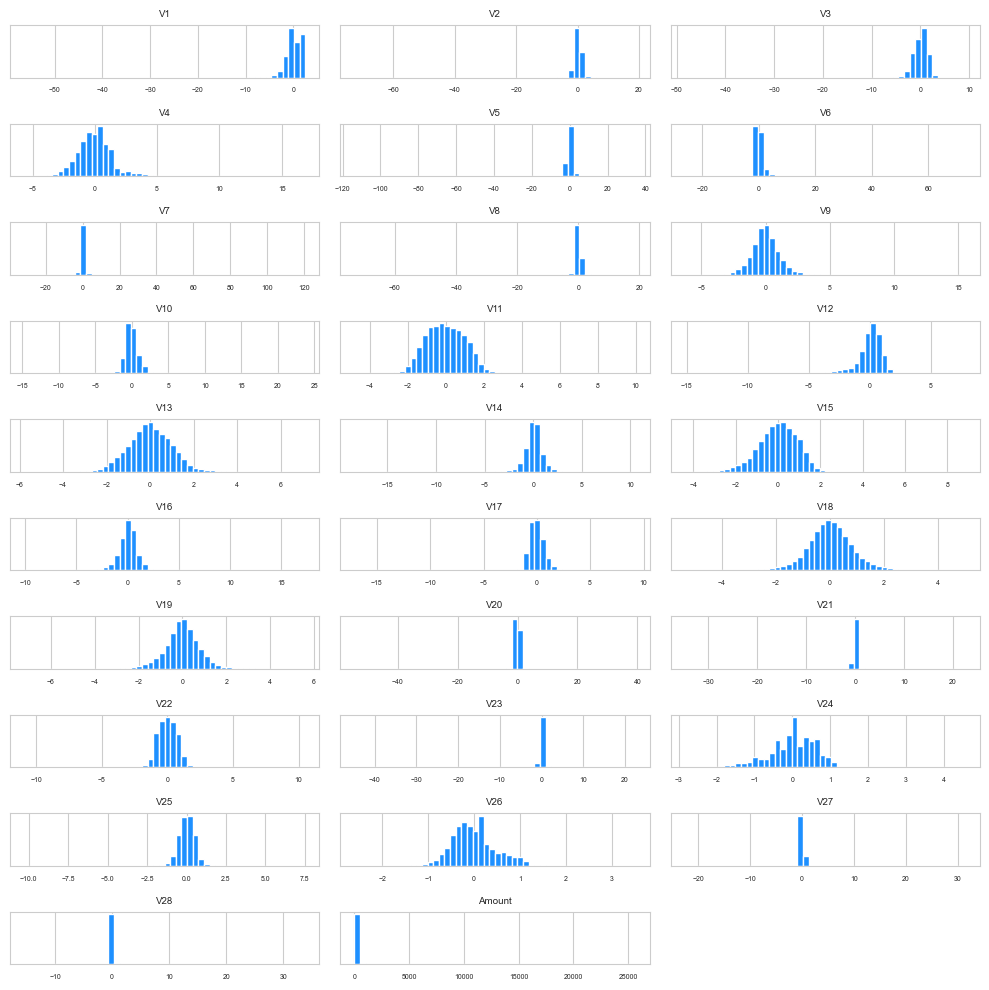

In [16]:
def plot_all_distributions(data:pd.DataFrame) -> None:
    fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(10, 10))
    for col, ax in zip([i for i in range(0, 29)], axes.ravel()):
        ax.hist(data.iloc[:, col], bins=50, color="dodgerblue")
        ax.set_yticks([])
        ax.tick_params(which="major", axis="both", labelsize=5)
        ax.set_title(data.columns.values[col], fontsize=7)
    axes[9, 2].set_axis_off()
    fig.tight_layout()
    
plot_all_distributions(normal)

In [17]:
def detect_outliers(df:pd.DataFrame) -> tuple[pd.DataFrame, set]:
    data = []
    indexes = set()
    for col in df.columns.values:
        mean = df[col].mean()
        std = df[col].std()
        upper_bound = mean + 3*std
        lower_bound = mean - 3*std
        mask = ((df[col] > upper_bound) | (df[col] < lower_bound))
        items = df[mask].shape[0]
        indexes.update({idx for idx in df[mask].index.values})
        data.append([col, mean, std, upper_bound, lower_bound, items])

    outlier_report = pd.DataFrame(data, 
                                   columns=[
                                       "Column", "Mean", "Standard Deviation", 
                                       "Upper Bound", "Lower Bound", "Outliers"
                                   ])
    
    return outlier_report, indexes

In [18]:
outlier_report, indexes = detect_outliers(normal)
outlier_report.style.background_gradient(subset=[
    "Outliers"
])

,Column,Mean,Standard Deviation,Upper Bound,Lower Bound,Outliers
0,V1,0.013439,1.922179,5.779975,-5.753098,3670
1,V2,-0.009829,1.633520,4.890731,-4.910389,4277
2,V3,0.012853,1.457593,4.385632,-4.359925,1943
3,V4,-0.010440,1.398575,4.185284,-4.206164,3124
4,V5,0.006769,1.355816,4.074217,-4.060680,2906
5,V6,0.001251,1.329914,3.990993,-3.988491,4624
6,V7,0.010447,1.177480,3.542888,-3.521994,3513
7,V8,-0.002448,1.157140,3.468972,-3.473868,4190
8,V9,0.002613,1.086902,3.263318,-3.258093,2177
9,V10,0.007663,1.036321,3.116625,-3.101299,3333


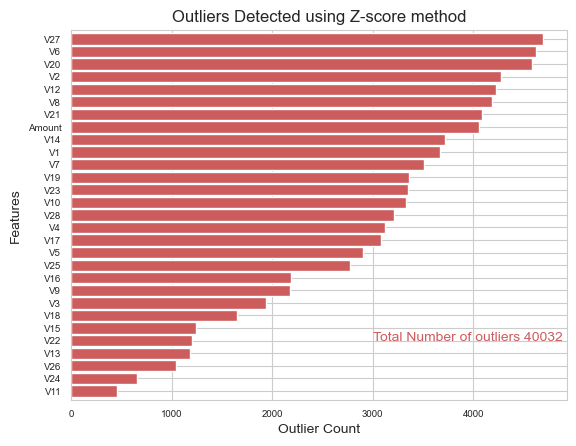

In [19]:
ax = outlier_report.sort_values(by="Outliers").plot(
    kind="barh", x="Column", y="Outliers",
    color="indianred", width=0.9
)

ax.tick_params(which="major", axis="both", labelsize=7)
ax.set_ylabel("Features")
ax.set_xlabel("Outlier Count")
ax.text(3000, 4, f"Total Number of outliers {len(indexes)}", fontsize=10, color="indianred")
ax.set_title("Outliers Detected using Z-score method")
ax.get_legend().remove()

In [20]:
clean_normal_X = normal.drop(indexes)
clean_normal_X.reset_index(drop=True, inplace=True)
clean_normal_X.shape

(243221, 29)

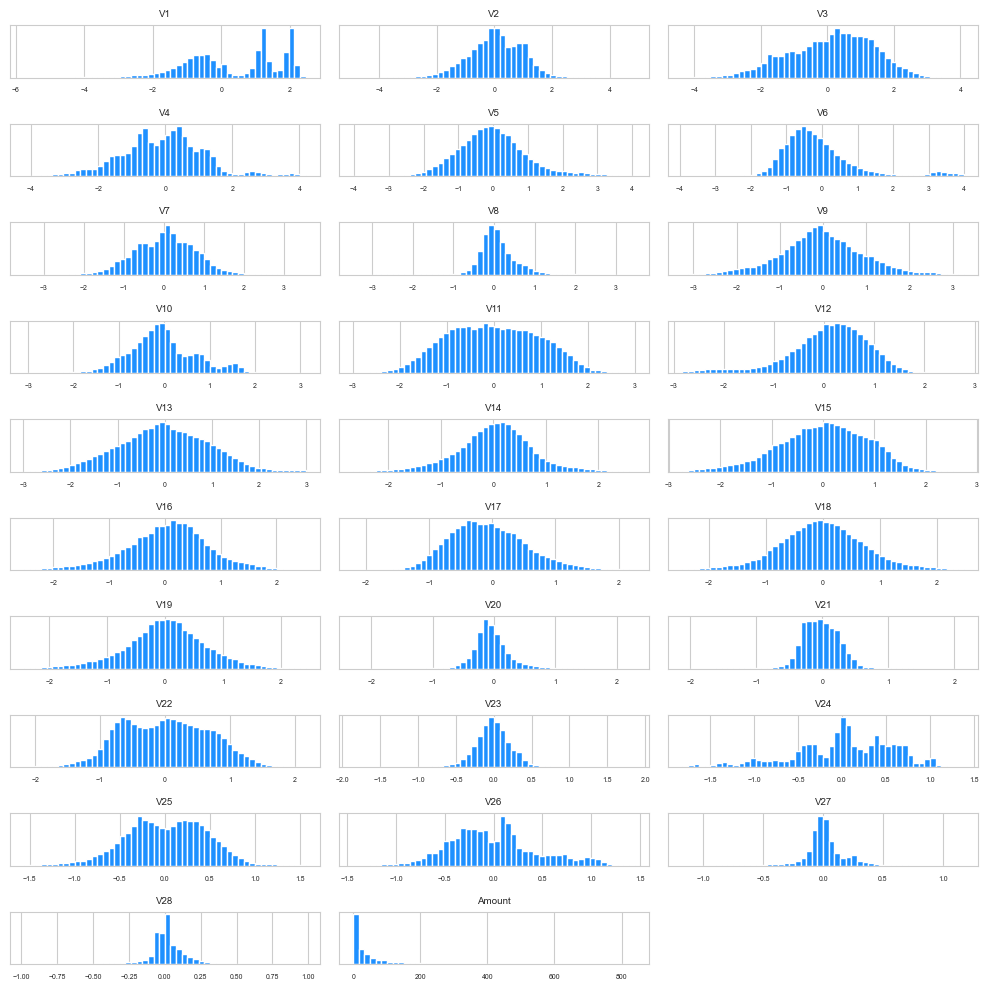

In [21]:
plot_all_distributions(clean_normal_X)

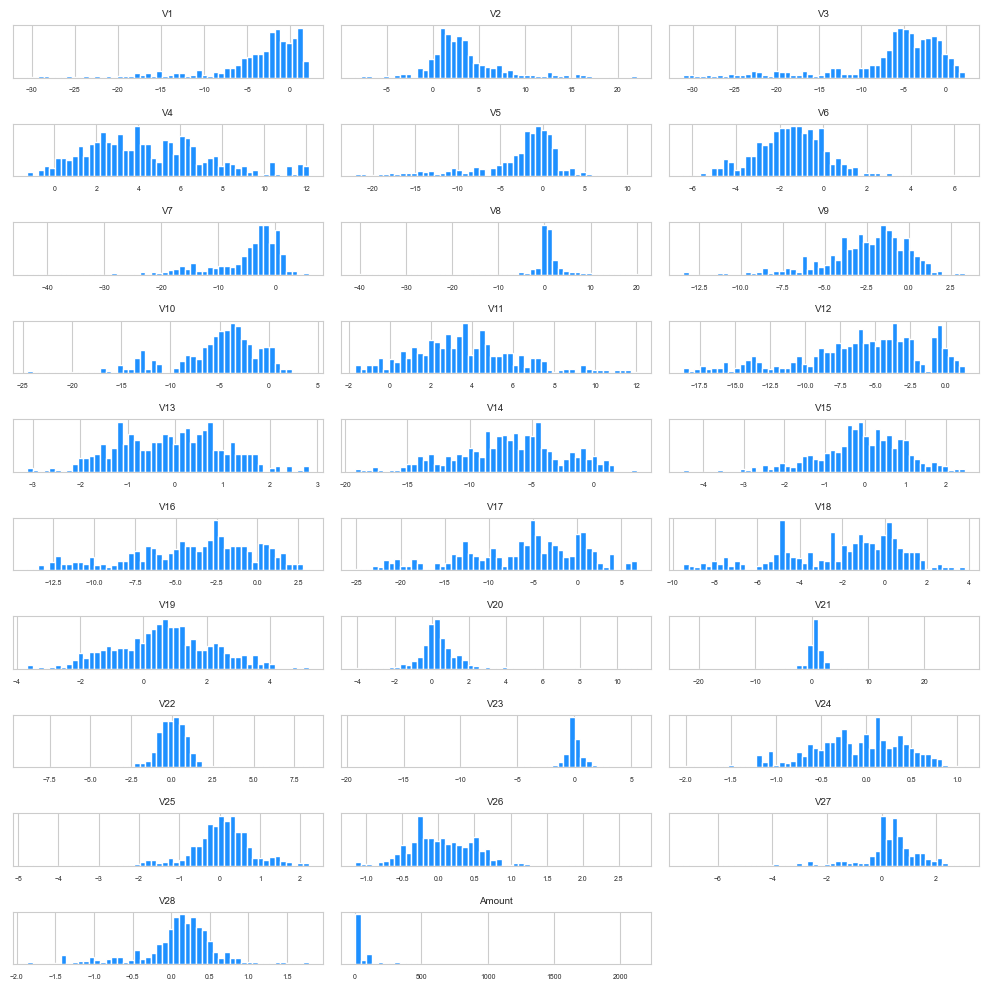

In [22]:
plot_all_distributions(fraud)

In [23]:
outlier_report, indexes = detect_outliers(fraud)
outlier_report.style.background_gradient(subset=[
    "Outliers"
])

,Column,Mean,Standard Deviation,Upper Bound,Lower Bound,Outliers
0,V1,-4.498280,6.593145,15.281156,-24.277716,13
1,V2,3.405965,4.122500,15.773465,-8.961536,9
2,V3,-6.729599,6.909647,13.999343,-27.458541,8
3,V4,4.472591,2.871523,13.087159,-4.141977,0
4,V5,-2.957197,5.278831,12.879297,-18.793690,8
5,V6,-1.432518,1.715347,3.713524,-6.578560,5
6,V7,-5.175912,6.858024,15.398160,-25.749984,7
7,V8,0.953255,5.585950,17.711103,-15.804594,11
8,V9,-2.522124,2.465047,4.873016,-9.917264,4
9,V10,-5.453274,4.706451,8.666079,-19.572627,6


In [24]:
clean_fraud_X = fraud.drop(indexes)
clean_fraud_X.reset_index(drop=True, inplace=True)
clean_fraud_X.shape

(425, 29)

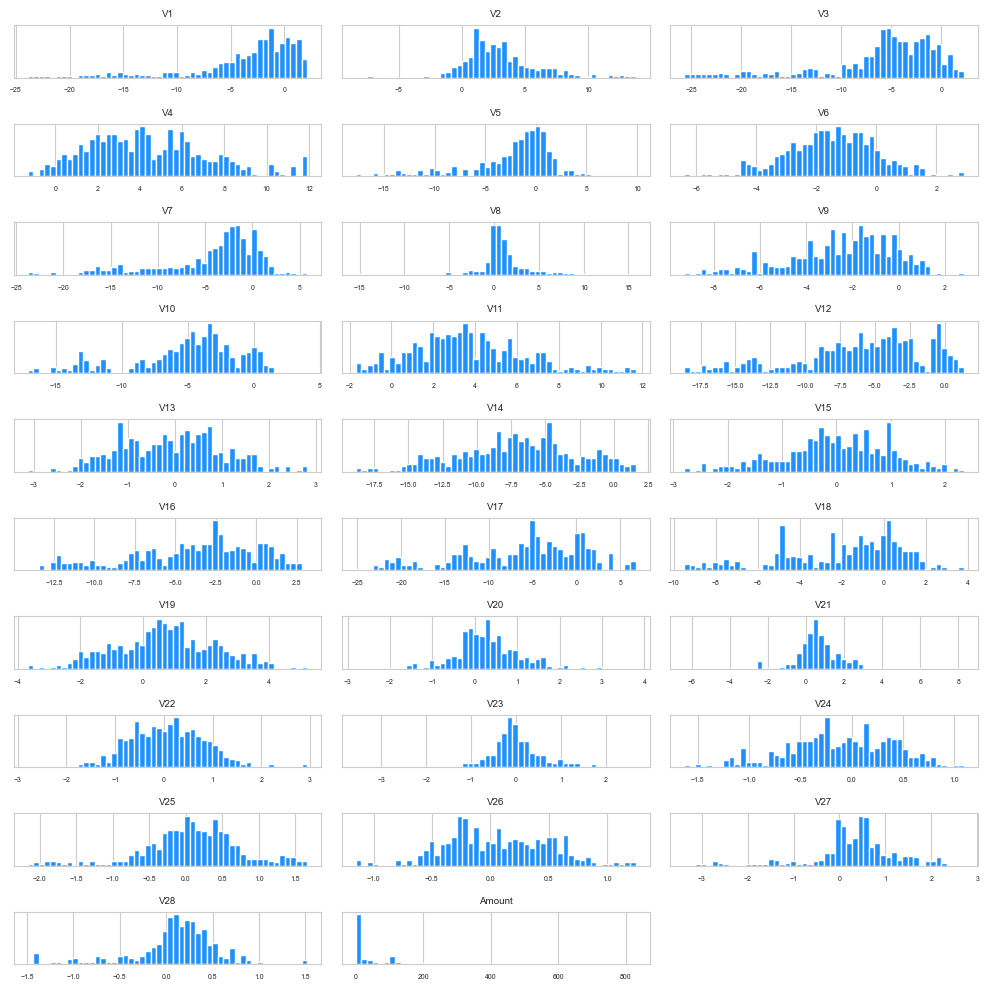

In [25]:
plot_all_distributions(clean_fraud_X)

In [26]:
sample_idx = np.random.randint(0, clean_normal_X.shape[0], size=500)

In [27]:
normal_X = clean_normal_X.drop(sample_idx, axis=0)
normal_y = np.zeros(clean_normal_X.shape[0])
mixed_X = pd.concat([clean_normal_X.iloc[sample_idx], clean_fraud_X])
mixed_y = np.concatenate((np.zeros(500), np.ones(clean_fraud_X.shape[0])), axis=0)

Here I have randomly sampled 500 normal data points, so that it can be visualized properly for analysis

In [28]:
normal_X.reset_index(drop=True, inplace=True)
mixed_X.reset_index(drop=True, inplace=True)

In [29]:
print("normal_X.shape = ", normal_X.shape)
print("mixed_X.shape  = ", mixed_X.shape)

normal_X.shape =  (242721, 29)
mixed_X.shape  =  (925, 29)


In [30]:
mean_amount = normal_X["Amount"].mean()
std_amount = normal_X["Amount"].std()

normal_X["Amount"] = normal_X["Amount"].apply(lambda x: np.round((x-mean_amount)/std_amount, 6))
mixed_X["Amount"] = mixed_X["Amount"].apply(
    lambda x: np.round((x-mean_amount)/std_amount, 6)
)

## EDA and Feature Extraction

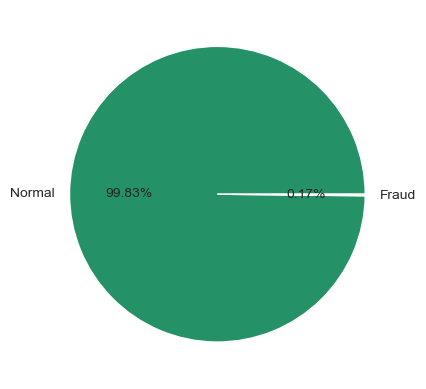

In [31]:
palette = sns.color_palette('summer')
plt.pie(df['Class'].value_counts().to_list(), labels=["Normal", "Fraud"], colors=palette, autopct="%.2f%%")
plt.show()

<Axes: >

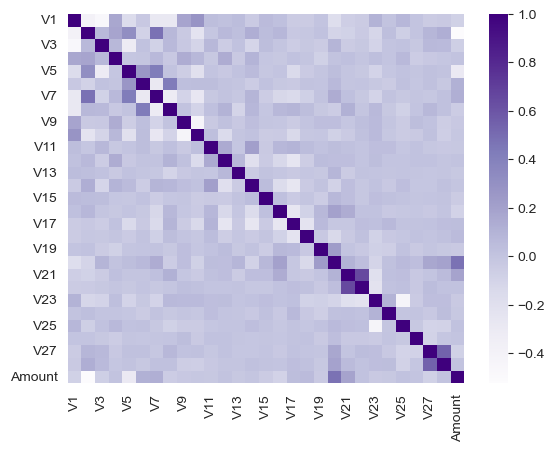

In [32]:
sns.heatmap(normal_X.corr(), cmap="Purples")

Features for normal data are uncorrelated

<Axes: >

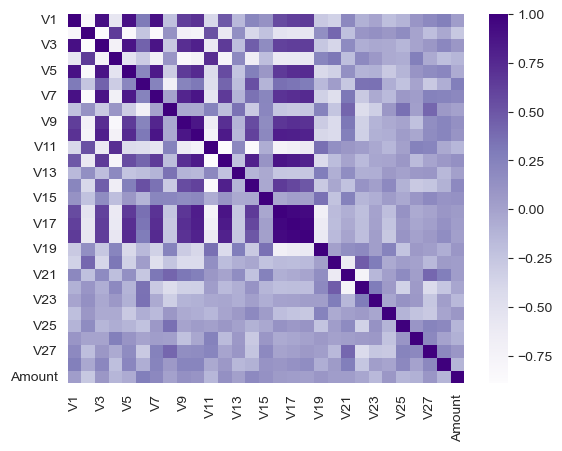

In [33]:
sns.heatmap(fraud.corr(), cmap="Purples")

Whereas for fraud data some features are correleated

Since the mixed set contains both type of samples, further analysis is performed on it.

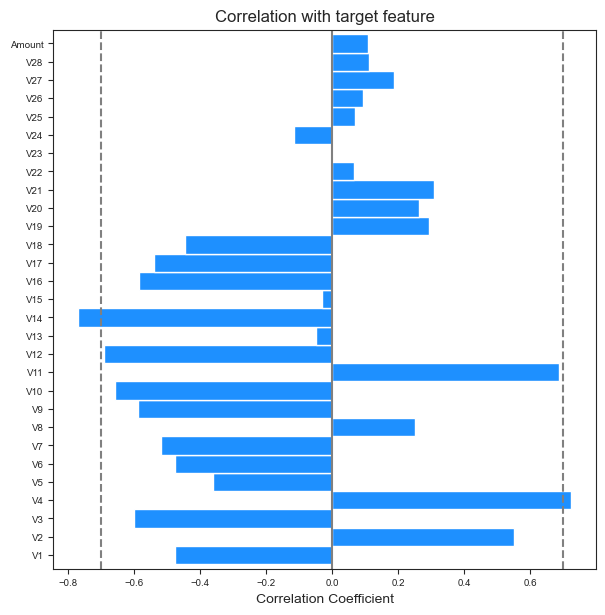

In [34]:
mixed_X["Target"] = mixed_y
sns.set_style("ticks")
ax = mixed_X.corr().iloc[:-1, -1].plot(kind="barh", color="dodgerblue", figsize=(7,7), width=1)
ax.tick_params(which="major", axis="both", labelsize=7)
ax.axvline(0, color="gray")
ax.axvline(-0.7, linestyle="--", color="gray")
ax.axvline(0.7, linestyle="--", color="gray")
ax.set_xlabel("Correlation Coefficient")
ax.set_title("Correlation with target feature", fontsize=12)
mixed_X.drop(["Target"], axis=1, inplace=True)

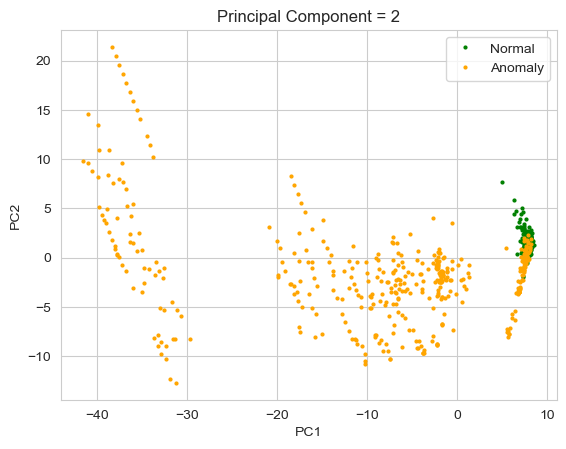

In [35]:
pca = PCA(n_components=2)
data = pca.fit_transform(mixed_X)
sns.set_style("whitegrid")
plt.plot(data[:, 0][mixed_y==0], data[:, 1][mixed_y==0],"o", markersize=2, c="g", label="Normal")
plt.plot(data[:, 0][mixed_y==1], data[:, 1][mixed_y==1],"o", markersize=2, c="orange", label="Anomaly")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Principal Component = 2")
plt.legend()

Using 2 principal components the distinction between the fraud and normal data is visible

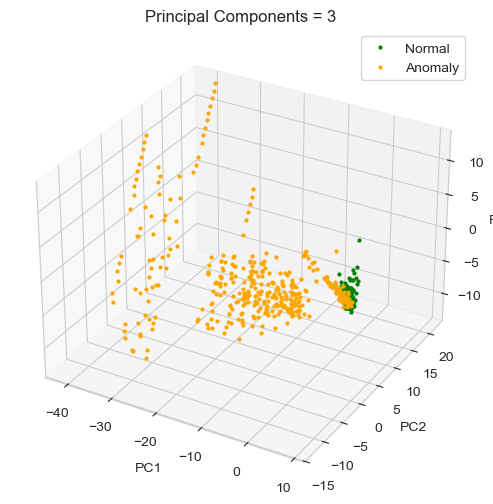

In [36]:
pca = PCA(n_components=3)
data = pca.fit_transform(mixed_X)

good = data[mixed_y == 0]
bad = data[mixed_y == 1]

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(projection ='3d')
ax.plot3D(good[:, 0], good[:, 1], good[:, 2], "o", markersize=2, c="g", label="Normal")
ax.plot3D(bad[:, 0], bad[:, 1], bad[:, 2], "o", markersize=2, c="orange", label="Anomaly")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Principal Components = 3")

ax.legend()
plt.show()

Here also using 3 principal components it can be observed that the fraud data is spread across the space whereas the normal data is centered around 0

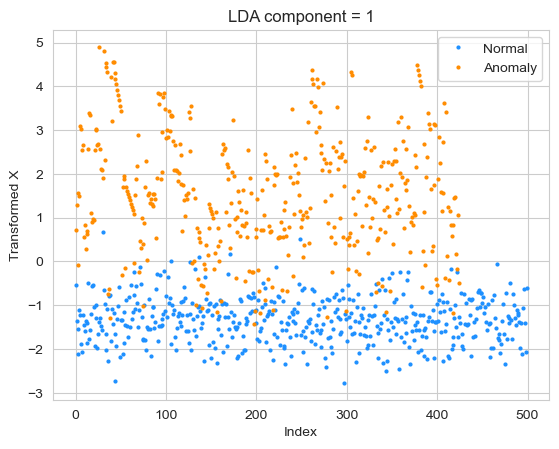

In [37]:
lda = LinearDiscriminantAnalysis(n_components=1)
data = lda.fit_transform(mixed_X, mixed_y)

plt.plot(data[mixed_y==0], "o", markersize=2, c="dodgerblue", label="Normal")
plt.plot(data[mixed_y==1], "o", markersize=2, c="darkorange", label="Anomaly")
plt.legend()
plt.xlabel("Index")
plt.ylabel("Transformed X")
plt.title("LDA component = 1")
plt.show()

Here also LDA using 1 component separates the data well

## ML models

### Handling Imbalance using Under-sampling

In [38]:
SAMPLE_SIZE = 500

In [39]:
sample_idx = np.random.randint(0, clean_normal_X.shape[0], size=SAMPLE_SIZE)

In [40]:
sample_X = pd.concat([clean_normal_X.iloc[sample_idx], clean_fraud_X])
sample_y = np.concatenate((np.zeros(SAMPLE_SIZE), np.ones(clean_fraud_X.shape[0])), axis=0)
sample_X.reset_index(drop=True, inplace=True)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    sample_X, sample_y, stratify=sample_y, test_size=0.1, random_state=42
)

In [42]:
print("X_train.shape = ", X_train.shape)
print("y_train.shape = ", y_train.shape)
print("X_test.shape = ", X_test.shape)
print("y_test.shape = ", y_test.shape)

X_train.shape =  (832, 29)
y_train.shape =  (832,)
X_test.shape =  (93, 29)
y_test.shape =  (93,)


In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
def apply_transformation(X_train:np.ndarray, y_train:np.ndarray, X_test:np.ndarray, transform:str = "None"):
    if transform.lower() == "pca":
        pca = PCA(n_components=2)
        X_train_trf = pca.fit_transform(X_train)
        X_test_trf = pca.transform(X_test)
        return X_train_trf, X_test_trf
    elif transform.lower() == "lda":
        lda = LinearDiscriminantAnalysis(n_components=1)
        X_train_trf = lda.fit_transform(X_train, y_train)
        X_test_trf = lda.transform(X_test)
        return X_train_trf, X_test_trf
    return X_train, X_test

In [62]:
def objective_function(trial):
    tranformation = trial.suggest_categorical("transform", ["None", "PCA", "LDA"])
    X_train_trf, X_test_trf = apply_transformation(X_train, y_train, X_test, tranformation)
    model_name = trial.suggest_categorical("model", ["RF", "LR", "NB", "DTC", "GBC"])
    model = None
    if model_name == "RF":
        n_estimators = trial.suggest_int("n_estimators", 50, 200)
        max_depth = trial.suggest_int("max_depth", 3, 15)
        max_features=trial.suggest_categorical("max_features", ["sqrt", "log2"])
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features)
    elif model_name == "LR":
        c = trial.suggest_float("C", 0.4, 1.0)
        solver = trial.suggest_categorical("solver", ["lbfgs", "liblinear", "newton-cg"])
        model = LogisticRegression(C=c, solver=solver)
    elif model_name == "NB":
        model = BernoulliNB()
    else:
        learning_rate = trial.suggest_float("learning_rate", 0.01, 0.1)
        max_depth = trial.suggest_int("max_depth", 3, 15)
        n_estimators = trial.suggest_int("n_estimators", 50, 200)
        model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
        
    model.fit(X_train_trf, y_train)
    y_pred = model.predict(X_test_trf) 
    score = f1_score(y_true=y_test, y_pred=y_pred)
    return score

In [63]:
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler())
study.optimize(objective_function, n_trials=70)

[I 2025-01-26 10:56:51,001] A new study created in memory with name: no-name-98878209-5b66-4e5d-b955-60425337c344
[I 2025-01-26 10:56:51,018] Trial 0 finished with value: 0.9512195121951219 and parameters: {'transform': 'None', 'model': 'LR', 'C': 0.5995876227556848, 'solver': 'newton-cg'}. Best is trial 0 with value: 0.9512195121951219.
[I 2025-01-26 10:56:51,269] Trial 1 finished with value: 0.9397590361445783 and parameters: {'transform': 'None', 'model': 'RF', 'n_estimators': 50, 'max_depth': 9, 'max_features': 'log2'}. Best is trial 0 with value: 0.9512195121951219.
[I 2025-01-26 10:56:51,839] Trial 2 finished with value: 0.9397590361445783 and parameters: {'transform': 'None', 'model': 'RF', 'n_estimators': 146, 'max_depth': 15, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9512195121951219.
[I 2025-01-26 10:56:52,034] Trial 3 finished with value: 0.9512195121951219 and parameters: {'transform': 'None', 'model': 'RF', 'n_estimators': 56, 'max_depth': 15, 'max_features': 

In [64]:
study.best_params

{'transform': 'None',
 'model': 'GBC',
 'learning_rate': 0.027717082637977168,
 'max_depth': 14,
 'n_estimators': 154}

In [65]:
study.best_value

0.9655172413793104

In [66]:
from optuna.visualization import plot_optimization_history, plot_param_importances, plot_contour, plot_slice 

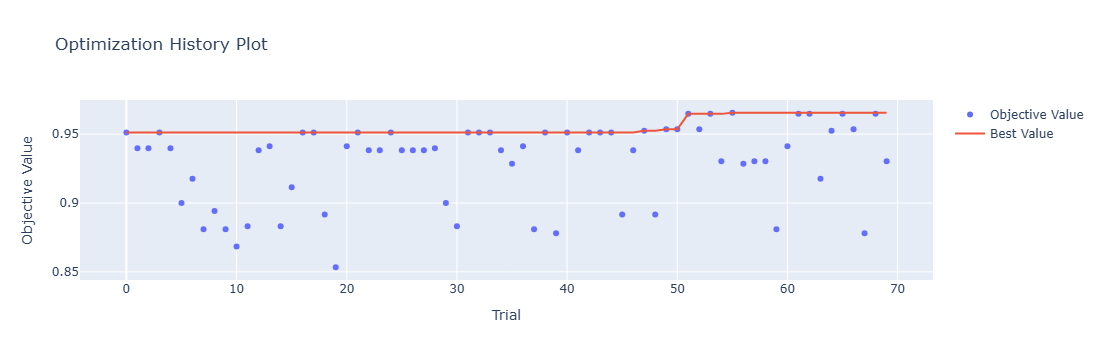

In [67]:
plot_optimization_history(study).show()

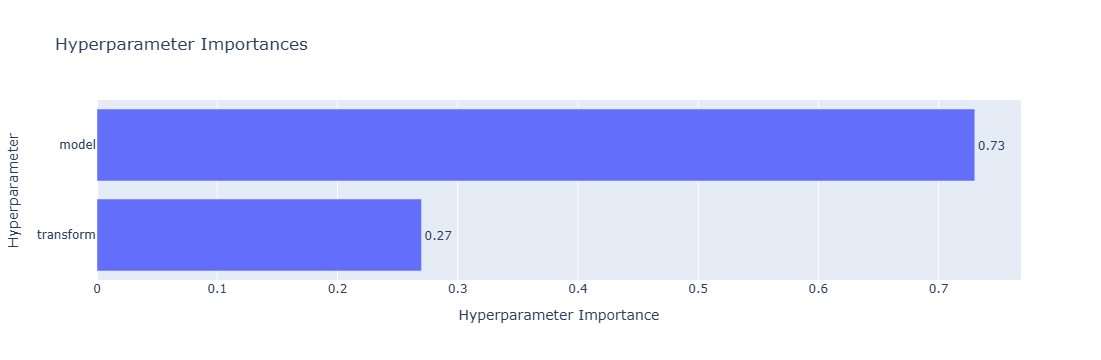

In [68]:
plot_param_importances(study).show()

In [69]:
clf = GradientBoostingClassifier(
    learning_rate=study.best_params['learning_rate'], 
    max_depth=study.best_params['max_depth'],
    n_estimators=study.best_params['n_estimators']
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        50
         1.0       0.98      0.95      0.96        43

    accuracy                           0.97        93
   macro avg       0.97      0.97      0.97        93
weighted avg       0.97      0.97      0.97        93



<Axes: >

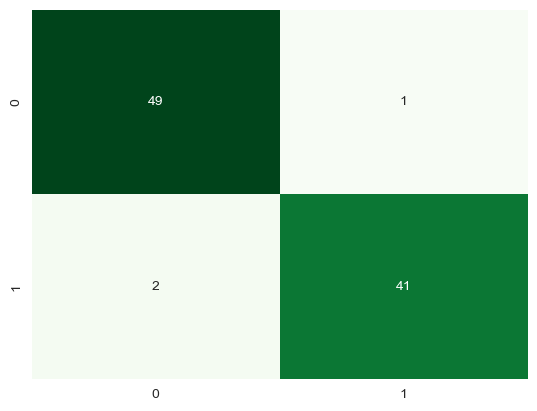

In [80]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="g", cmap="Greens", cbar=False)

### SMOTE

In [81]:
sample_idx = np.random.randint(0, clean_normal_X.shape[0], size=2000)
sample_X = pd.concat([clean_normal_X.iloc[sample_idx], clean_fraud_X])
sample_y = np.concatenate((np.zeros(2000), np.ones(clean_fraud_X.shape[0])), axis=0)
sample_X.reset_index(drop=True, inplace=True)

In [82]:
print(sample_X.shape)
print(sample_y.shape)

(2425, 29)
(2425,)


In [83]:
sampler = SMOTE(random_state=42)
resample_X, resample_y = sampler.fit_resample(sample_X, sample_y)

In [84]:
print(resample_X.shape)
print(resample_y.shape)

(4000, 29)
(4000,)


In [85]:
X_train, X_test, y_train, y_test = train_test_split(resample_X, resample_y, stratify=resample_y, random_state=42)

In [86]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler())
study.optimize(objective_function, n_trials=50)

[I 2025-01-26 11:14:55,220] A new study created in memory with name: no-name-150c908b-2c83-4eeb-8dd5-57b150156172
[I 2025-01-26 11:14:55,573] Trial 0 finished with value: 0.9342770475227502 and parameters: {'transform': 'LDA', 'model': 'GBC', 'learning_rate': 0.044600497913171555, 'max_depth': 6, 'n_estimators': 57}. Best is trial 0 with value: 0.9342770475227502.
[I 2025-01-26 11:14:55,593] Trial 1 finished with value: 0.9276595744680851 and parameters: {'transform': 'LDA', 'model': 'NB'}. Best is trial 0 with value: 0.9342770475227502.
[I 2025-01-26 11:15:02,300] Trial 2 finished with value: 0.9633300297324083 and parameters: {'transform': 'None', 'model': 'DTC', 'learning_rate': 0.03111644961946116, 'max_depth': 15, 'n_estimators': 57}. Best is trial 2 with value: 0.9633300297324083.
[I 2025-01-26 11:15:02,909] Trial 3 finished with value: 0.9214659685863874 and parameters: {'transform': 'PCA', 'model': 'RF', 'n_estimators': 195, 'max_depth': 6, 'max_features': 'log2'}. Best is tria

In [88]:
study.best_params

{'transform': 'None',
 'model': 'RF',
 'n_estimators': 76,
 'max_depth': 14,
 'max_features': 'sqrt'}

In [89]:
study.best_value

0.9838383838383838

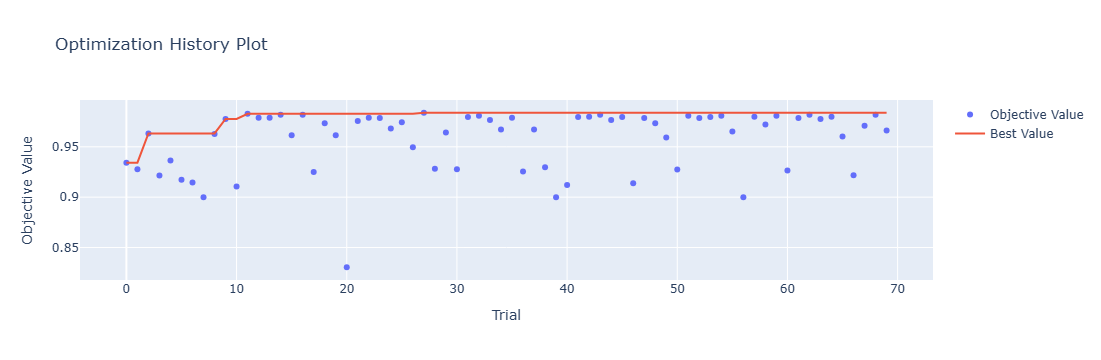

In [90]:
plot_optimization_history(study).show()

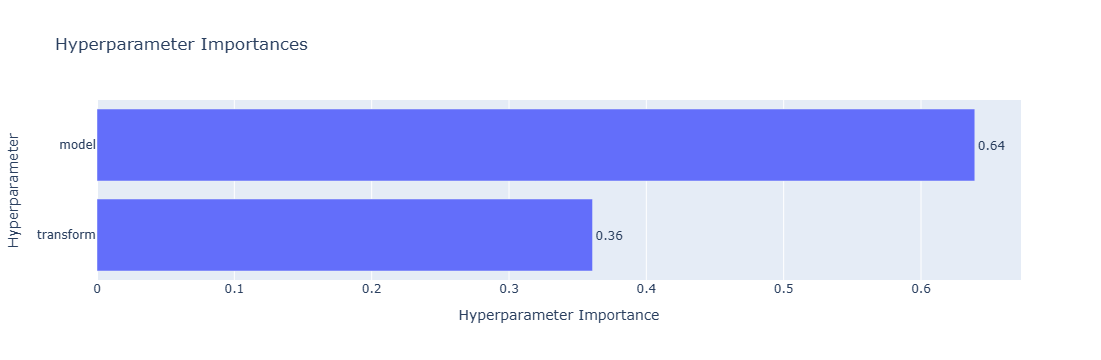

In [91]:
plot_param_importances(study).show()

In [93]:
clf = RandomForestClassifier(
    max_features=study.best_params['max_features'], 
    max_depth=study.best_params['max_depth'],
    n_estimators=study.best_params['n_estimators']
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       500
         1.0       0.99      0.97      0.98       500

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



<Axes: >

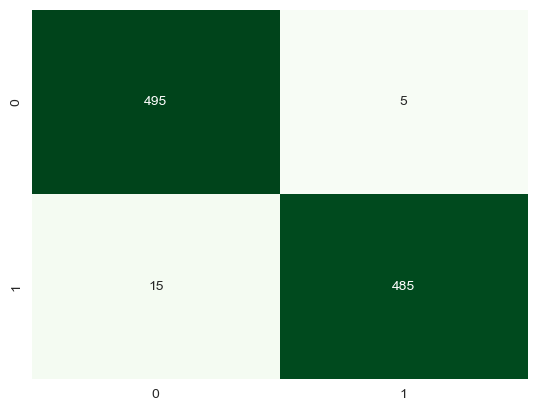

In [94]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="g", cmap="Greens", cbar=False)

In [96]:
import pickle

In [98]:
with open("RF.pkl", "wb") as f:
    pickle.dump(clf, f)

## AutoEncoder

- An AutoEncoder model is trained to model the normal data. Given a normal data sample, the model reconstructs a similar sample.
- The reconstruction loss given a normal sample will be less than when a fraud sample is passed to the model.

- Using the reconstruction loss the fraud and normal data can be identified.

In [42]:
config = {
    "input_shape":normal_X.shape,
    "batch_size":64,
    "epochs":50,
    "learning_rate":0.001,
}

In [43]:
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(config["input_shape"][1],)),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(config["input_shape"][1], activation='linear')
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                960       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_4 (Dense)              (None, 29)                493       
Total params: 2,261
Trainable params: 2,261
Non-trainable params: 0
_________________________________________________________________


2025-01-17 11:59:56.104081: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-01-17 11:59:56.112740: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-01-17 11:59:56.113042: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-01-17 11:59:56.114430: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [44]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=config["learning_rate"]))

In [45]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model.keras',
    monitor='loss',
    mode='min',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

callbacks = [checkpoint, early_stopping]

In [46]:
history = model.fit(
    normal_X, normal_X,
    epochs=config['epochs'],
    batch_size=config['batch_size'],
    callbacks=callbacks
)

2025-01-17 11:59:56.764124: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
3793/3793 [==============================] - 7s 2ms/step - loss: 0.2393

Epoch 00001: loss improved from inf to 0.23934, saving model to best_model.keras
Epoch 2/50
3793/3793 [==============================] - 7s 2ms/step - loss: 0.1748

Epoch 00002: loss improved from 0.23934 to 0.17480, saving model to best_model.keras
Epoch 3/50
3793/3793 [==============================] - 7s 2ms/step - loss: 0.1689

Epoch 00003: loss improved from 0.17480 to 0.16888, saving model to best_model.keras
Epoch 4/50
3793/3793 [==============================] - 6s 2ms/step - loss: 0.1620

Epoch 00004: loss improved from 0.16888 to 0.16198, saving model to best_model.keras
Epoch 5/50
3793/3793 [==============================] - 7s 2ms/step - loss: 0.1574

Epoch 00005: loss improved from 0.16198 to 0.15740, saving model to best_model.keras
Epoch 6/50
3793/3793 [==============================] - 5s 1ms/step - loss: 0.1548

Epoch 00006: loss improved from 0.15740 to 0.15484, saving model to best_mo


Epoch 00049: loss improved from 0.12089 to 0.12066, saving model to best_model.keras
Epoch 50/50
3793/3793 [==============================] - 5s 1ms/step - loss: 0.1204

Epoch 00050: loss improved from 0.12066 to 0.12040, saving model to best_model.keras


## Evaluation

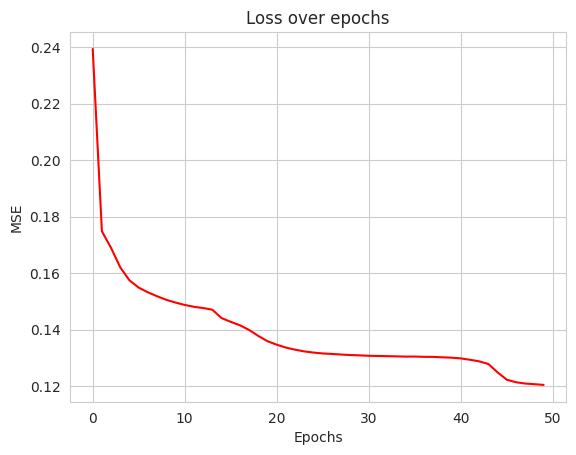

In [47]:
plt.plot(history.history['loss'], c='r')
plt.title("Loss over epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.show()

In [48]:
pred = model.predict(mixed_X)

In [49]:
reconstruction_loss = np.mean((mixed_X - pred)**2, axis=1) # Using MSE as the loss function

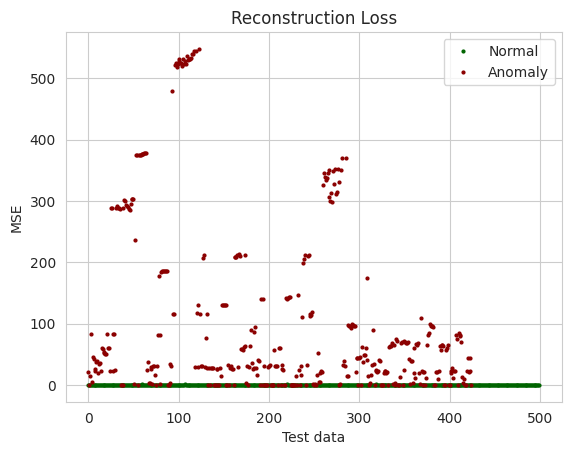

In [50]:
plt.plot(reconstruction_loss[mixed_y==0].to_numpy(), "o", markersize=2, color="darkgreen", label="Normal")
plt.plot(reconstruction_loss[mixed_y==1].to_numpy(), "o", markersize=2, color="darkred", label="Anomaly")
plt.title("Reconstruction Loss")
plt.ylabel("MSE")
plt.xlabel("Test data")
plt.legend()

The reconstruction loss for the fraud samples are higher than normal samples

In [51]:
real = reconstruction_loss[mixed_y == 0].to_numpy()
anomaly = reconstruction_loss[mixed_y == 1].to_numpy()

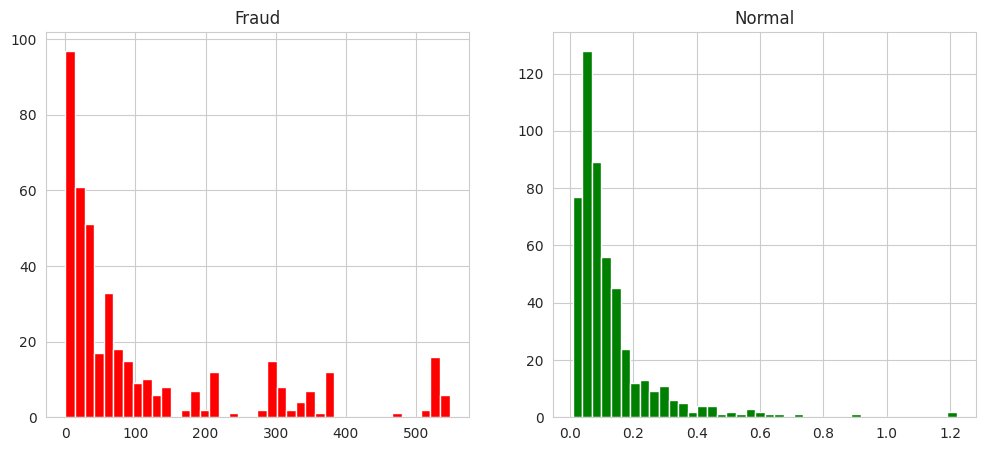

In [52]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title("Fraud")
plt.hist(anomaly, bins=40, color='r')
plt.subplot(122)
plt.title("Normal")
plt.hist(real, bins=40, color='g')
plt.show()

Here from the distribution it can be observed that for some fraud samples the loss is near 0

In [53]:
thresholds = np.arange(0.5, 2, 0.1)
scores = {"recall":[], "f1":[]}
for threshold in thresholds:
    y_pred = [0 if l < threshold else 1 for l in reconstruction_loss]
    scores["recall"].append(recall_score(mixed_y, y_pred))
    scores["f1"].append(f1_score(mixed_y, y_pred))

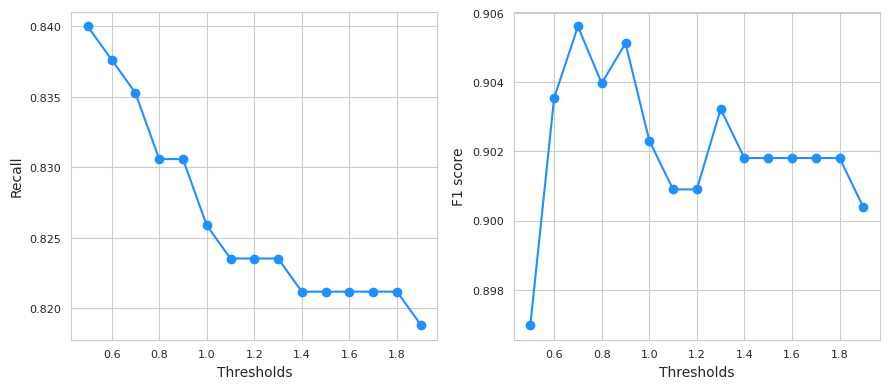

In [54]:
fig, axes = plt.subplots(1,2, figsize=(9,4))
axes[0].plot(thresholds, scores["recall"], marker="o", color="dodgerblue")
axes[0].set_xlabel("Thresholds")
axes[0].set_ylabel("Recall")
axes[0].tick_params(which="major", axis="both", labelsize=8)
axes[1].plot(thresholds, scores["f1"], marker="o", color="dodgerblue")
axes[1].set_xlabel("Thresholds")
axes[1].set_ylabel("F1 score")
axes[1].tick_params(which="major", axis="both", labelsize=8)
fig.tight_layout()

In [55]:
threshold = thresholds[np.argmax(scores["f1"])]

y_pred = [0 if x < threshold else 1 for x in reconstruction_loss]

In [56]:
print(classification_report(y_true=mixed_y, y_pred=y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       500
         1.0       0.99      0.84      0.91       425

    accuracy                           0.92       925
   macro avg       0.93      0.91      0.92       925
weighted avg       0.93      0.92      0.92       925



Text(0.5, 1.0, 'Confusion Matrix')

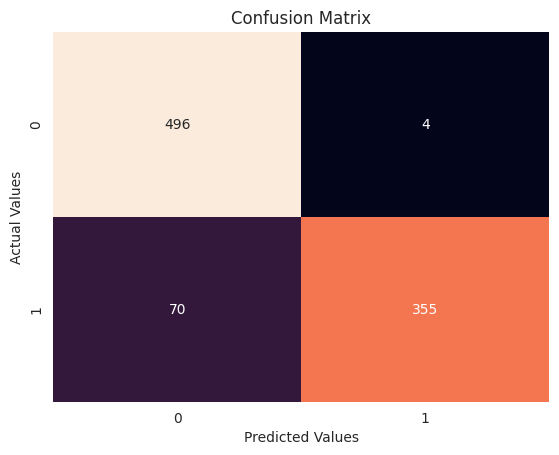

In [57]:
sns.heatmap(confusion_matrix(y_true=mixed_y, y_pred=y_pred), annot=True, cmap="rocket", fmt="g", cbar=False)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix")

In [58]:
model.save('autoencoder.keras')

In [59]:
tf.keras.backend.clear_session()